# Stochastic process

Let $x = x(t)$ be a time-dependent variable and $W = W(t)$ be the standard Wiener process and consider SDE

$$
dx = \mu dt + \sigma dW
$$

One also has the integral form:

$$
x(t) - x(t_0) =  \int_{t_0}^{t} \mu dt' + \int_{t_0}^{t} \sigma dW(t')
$$

If the initial condition is $x(t_0) = 0$ and $\mu$ and $\sigma$ are constants the integral form now reads

$$
x(t) = \mu(t-t_0) + \sigma(W(t) - W(t_0))
$$

The last term $W_t - W_{t_0}$ has mean $0$ and variance $\delta = t - t_0$, i.e., $N(0, \delta)$.

Thus one has
$$
p(x) \sim N(\mu\delta, \sigma^2 \delta)
$$



Note.

 * For a standard Wiener process $W_0 = 0$ alsmost surely.
 * $dW_t = W_{t+\delta t} - W_t \sim N(0, \delta t)$: Gaussian increments
 * $cov(W_t, W_\tau) = \min (t, \tau)$

In [1]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline

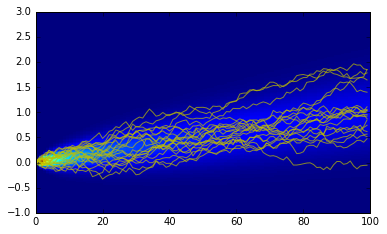

In [2]:
mu = 1.
sigma = 0.5

D = 20     # no. of sample paths
dt = 0.01  # time step
N = 100      # steps
S = [-mu, 3 * mu, 150]
X = np.zeros((N, D))  # sample paths
P = np.zeros((S[2], N))
py = np.linspace(S[0], S[1], S[2])[-1::-1]

T = np.linspace(0, N * dt, N)
E = mu * T
V = sigma ** 2 * T

W = stat.norm(loc=0, scale=np.sqrt(dt))

for i in range(1, N):
    X[i, :] = X[i - 1, :] + mu * dt + sigma * W.rvs(D)
    Q = stat.norm(loc=E[i], scale=np.sqrt(V[i]))
    P[:, i] = Q.pdf(py)

fig, axs = plt.subplots(1, 1)
axs.imshow(P, interpolation='nearest', extent=[0, N, S[0], S[1]], aspect=15);
axs.plot(X, alpha=0.7, color='y');

 ** Simulate an Ornstein-Uhlenbeck (mean-reverting) process **

For SDE

$$
dx = \theta (\mu - x)dt + \sigma dW
$$

Let

$$
\begin{align}
    y &= f(x, t) = (\mu - x)\exp(\theta t)\\
    y' &= -\exp(\theta t)\\
    y'' &= 0\\
    \dot{y} &= \theta (\mu - x)\exp(\theta t)
    \end{align}
$$

Follow It$\hat{\mathrm o}$'s lemma

$$
dy = -\sigma\exp(\theta t)dW
$$

which gives

$$
\begin{align}
    x_t =& \mu - (\mu - x_0)\exp(-\theta t) \\
    &+ \int_0^t \sigma\exp[\theta(\tau - t)]dW_\tau
    \end{align}
$$

For the mean

$$
\langle x_t \rangle = \mu - (\mu - x_0)\exp(-\theta t)
$$

and the mean (using It$\hat{\mathrm o}$ isometry)

$$
\begin{align}
    \left\langle \left[ x_t - \langle x_t \rangle \right]^2 \right\rangle
        &= \left\langle \left(
            \int_0^t \sigma\exp[\theta(\tau - t)]dW_\tau
            \right)^2 \right\rangle\\
        &= \left\langle
            \int_0^t \sigma^2\exp[ 2\theta(\tau - t)]dt
            \right\rangle\\
        &= \frac{\sigma^2}{2\theta}
            \left[1 - \exp(-2\theta t)]\right]
    \end{align}
$$

In [ ]:
# parameters
theta = 4.  # speed of reaching equilibrium
mu = 3.5    # equilibrium mode
sigma = 1.

dt = 0.01  # time step
N = 100    # no. of time bins
K = 20     # no. of sample paths
S = [-mu * .1, mu * 1.5, 100]  # support of pdf and no. of bins

X = np.zeros((N, K))
W = stat.norm(loc=0, scale=1)

T = np.linspace(0, N * dt, N)
E = mu - mu / np.exp(theta * T)
V = 0.5 * sigma ** 2 / theta * (1 - np.exp(-2 * theta * T))
Py = np.linspace(S[0], S[1], S[2])[-1::-1]
P = np.zeros((S[2], N))

# Integrate SDE using Euler-Maruyama method
# Obtain pdf at each time
for i in range(1, N):
    Q = stat.norm(loc=E[i], scale=np.sqrt(V[i]))
    X[i, :] = X[i - 1, :] + dt * theta * (mu - X[i - 1, :]) + sigma * np.sqrt(dt) * W.rvs(K)
    P[:, i] = Q.pdf(Py)

fig, axs = plt.subplots(1, 1)
axs.imshow(P, interpolation='none', extent=[0, N, S[0], S[1]], aspect=15);
axs.plot(X,alpha=0.7, color='y');

** Stochastic Fitzhugh-Nagumo model **

$$
\begin{align}
    d\pmb v &= [\pmb f(\pmb v) - \pmb r - I]dt + \beta d\pmb{W_v}\\
    d\pmb r &= b(\pmb v - \gamma \pmb r)dt
    \end{align}
$$

where

$$
f(\pmb v) = k\pmb v (\pmb v - a) (1 - \pmb v)
$$

In [ ]:
a = 0.1
b = 0.015
gamma = 0.2
I = 1.5
beta = 0.05

In [ ]:
dt = 0.1
N = 1500
K = 20     # no. of particles

dW = stat.norm(loc=0, scale=np.sqrt(dt))

v0, r0 = 1., 1.
v_particle = np.ones((N, K))  # voltage
r_particle = np.ones((N, K))  # recovery

def ff(v, a, k=1):
    return k * v * (v - a) * (1 - v)

for i in range(N):
    v_particle[i] = v0
    r_particle[i] = r0
    del_v0 = dt * (ff(v0, a) - r0 + I) + beta * dW.rvs(K)
    del_r0 = dt * b * (v0 - gamma * r0)
    v0 += del_v0
    r0 += del_r0
    
plt.figure()
plt.plot(v_particle, r_particle, '.-', alpha=0.1);
plt.figure()
plt.subplot(211)
plt.plot(v_particle);
plt.subplot(212)
plt.plot(r_particle);

Examine the following SDE

$$
d\pmb x = \mathbf f(\pmb x)dt + \pmb\sigma d\pmb W
$$

where

$$
dW_i \sim N(0, \pmb \Sigma_i)
$$
We have the following dynamics under Gaussian approximation

$$
p(\pmb x) \sim N(\pmb x; \pmb\mu, \pmb C)
$$


$$
\begin{align}
    \dot\mu_i &= \mathrm f_i(\pmb\mu) + \frac 1 2 \sum_{j,k} H_{ijk}(\pmb\mu)C_{jk}\\
    \dot C_{ij} &= \sum_k J_{ik}(\pmb\mu)C_{jk} + \sum_k J_{jk}(\pmb\mu)C_{ik} + V_{ij}
    \end{align}
$$

Or

$$
\begin{align}
    \dot{\pmb\mu} &= \mathbf f(\pmb\mu) + \frac 1 2 tr
        \left[\pmb{CH}(\pmb\mu)\right]\\
    \dot{\pmb C} &= \pmb J(\pmb\mu)\pmb C + \pmb{CJ}(\pmb\mu)^T + \pmb\sigma^2\pmb\Sigma
    \end{align}
$$

We have

$$
\begin{align}
    \pmb x &= \left(
        \begin{array}{c}
            \pmb v\\ \pmb r
            \end{array}\right) \\
    \pmb\sigma &= \left(
        \begin{array}{c}
        \beta\\ 0
        \end{array}\right) \\
    \mathbf f &= \left(
        \begin{array}{c}
        \mathbf f_{\pmb v} \\ \mathbf f_{\pmb r}
        \end{array}\right) = \left(
        \begin{array}{l}
            \pmb f(\pmb v) - \pmb r - I \\ b(\pmb v - \gamma\pmb r)
            \end{array}\right)
    \end{align}
$$

And

$$
\begin{align}
    \pmb J &= \frac{\partial\mathbf f}{\partial\pmb x}\\
    &= \left(
        \begin{array}{cc}
            \frac{\partial\mathrm f_{\pmb v}}{\partial\pmb v} &&
            \frac{\partial\mathrm f_{\pmb v}}{\partial\pmb r} \\
            \frac{\partial\mathrm f_{\pmb r}}{\partial\pmb v} &&
            \frac{\partial\mathrm f_{\pmb r}}{\partial\pmb r}
            \end{array}\right) \\
    &= \left(
        \begin{array}{ll}
        \frac{\partial\mathrm f_{\pmb v}}{\partial\pmb v} &&
        -1 \\
        b &&
        -b\gamma
        \end{array}\right)
    \end{align}
$$

$$
\begin{align}
    \pmb H_{\pmb v} &= \frac
        {\partial^2 \mathrm f_{\pmb v}}{\partial^2 \pmb x}
    \end{align}
$$

In [ ]:
x, g = T.vectors(2)
C = T.matrix()

S = np.array([beta, 0]) ** 2 * np.eye(2) * np.sqrt(dt)

# dynamical equations for [0] voltage and [1] recovery
g = [
    ff(x[0], a) - x[1] + I,
    b * (x[0] - gamma * x[1])]
g = T.join(0, g)

# Jacobian and Hessian
J = T.jacobian(g, x)
H = T.hessian(g[0], [x]) + T.hessian(g[1], [x])
    
dv = g[0] + 0.0 * T.nlinalg.trace(H[0] * C)
dr = g[1] + 0.0 * T.nlinalg.trace(H[1] * C)
dC = J.dot(C) + C.dot(J.T) + S

In [ ]:
dv_em = function([x, C], dv, on_unused_input='ignore', allow_input_downcast=True)
dr_em = function([x, C], dr, on_unused_input='ignore', allow_input_downcast=True)
dC_em = function([x, C], dC, on_unused_input='ignore', allow_input_downcast=True)

In [ ]:
v0 = 1.
r0 = 1.
C0 = S.copy()

x_ensemble = np.ones((N, 2))
C_ensemble = np.ones((N, 2, 2)) * C0

for i in range(1, N):
    delta_v0 = dt * dv_em([v0, r0], C0)
    delta_r0 = dt * dr_em([v0, r0], C0)
    delta_C0 = dt * dC_em([v0, r0], C0)
    v0 += delta_v0
    r0 += delta_r0
    C0 += delta_C0

    x_ensemble[i, :] = [v0, r0]
    C_ensemble[i, :, :] = C0

In [ ]:
plt.figure()
plt.plot(x_ensemble[:, 0], x_ensemble[:, 1], '.-')
plt.figure()
plt.subplot(511)
plt.plot(x_ensemble[:, 0]);
plt.subplot(512)
plt.plot(x_ensemble[:, 1]);
plt.subplot(513)
plt.plot(C_ensemble[:, 0, 0]);
plt.subplot(514)
plt.plot(C_ensemble[:, 1, 1]);
plt.subplot(515)
plt.plot(C_ensemble[:, 0, 1]);

In [ ]:
plt.figure()
plt.hold(True)
plt.plot(v_particle, r_particle, 'y.', alpha=0.05)
plt.plot(x_ensemble[0::20, 0], x_ensemble[0::20, 1], 'b.-')

x_axis = np.mgrid[-0.4:1.4:300j, 0.9:1.7:300j]
for i in range(10, N, 100):
    p = stat.multivariate_normal(mean=x_ensemble[i, :], cov=C_ensemble[i])
    ps = p.pdf(x_axis.transpose([1, 2, 0]))
    plt.contour(x_axis[0], x_axis[1], ps, 1)

### Embedding

Continuous time autoregressive process (OU)

$$
\sum_{k=0}^{p} \varphi_k x_t^{(k)} = \beta_0 z_t
$$

where 

$$
\begin{align}
    x_t^{(1)} &= \dot{x_t}\\
    x_t^{(2)} &= \ddot{x_t}\\
    \vdots &
    \end{align}
$$

Say, for example, for $OU(1)$, we have

$$
\begin{align}
    \varphi_0 x_t + \varphi_1 \dot{x_t} &= \beta_0 z_t\\
    \dot{x_t} &= -\frac{\varphi_0}{\varphi_1} x_t + \frac{\beta_0}{\varphi_1} z_t\\
    dx_t &= -\frac{\varphi_0}{\varphi_1} x_t dt + \frac{\beta_0}{\varphi_1} dW_t\\
    \end{align}
$$

which is a standard Ornstein-Uhlenbeck process.

Now we turn to a higher-order version, say,

$$
\varphi_0 x_t + \varphi_1 \dot{x_t} + \varphi_2\ddot{x_t} + \varphi_3\dddot{x_t} +
    \varphi_4\ddddot{x_t} = \beta_0 z_t
$$

With change of variables, one may turn this into a first-order ODE, using

$$
u = (u_0, u_1, u_2, u_3)^T = \left(x_t, \dot{x_t}, \ddot{x_t}, \dddot{x_t}\right)^T
$$

Thus,

$$
\begin{align}
    \dot{u} &= \left(\dot{x_t}, \ddot{x_t}, \dddot{x_t}, \ddddot{x_t}\right)^T\\
    &= \left(\begin{array}{l}
        u_2\\ u_3\\ u_4\\
        \frac{1}{\varphi_4}\left(
            \beta_0 z_t - \varphi_0 u_0 - \varphi_1 u_1 - \varphi_2 u_2 - \varphi_3 u_3
        \right)\end{array}\right)
    \end{align}
$$


And if we let

$$
\begin{align}
    \mathcal{D} &= \left(\begin{array}{ccc}
        0 & 1 & 0 &  \\
          & 0 & 1 & 0\\
          &   & 0 & 1\\
          &   &   & 0\\
        \end{array}\right)\\
    A &= -\frac{1}{\varphi_4}\left(\begin{array}{ccc}
        0& & &\\
         & \ddots& &\\
         & & & 0\\
        \varphi_0 & \varphi_1 & \varphi_2 & \varphi_3
        \end{array}\right)\\
    B &= \left(\begin{array}{ccc}
          & & &\\
          & & &\\
          & & &\\
        0 & 0 & 0 &
        \frac{\beta_0}{\varphi_4}
        \end{array}\right)
    \end{align}
$$

Such that we have

$$
\dot u = (\mathcal D + A)u + Cz_0
$$

Or

$$
du = (\mathcal D + A)udt + CdW_t
$$

where $\mathcal D$ is a derivative operator.

In [ ]:
p = 2
phi = np.array([100., 2.])
beta = 1.
dt = 0.01
N = 200

F = np.eye(p, k=1) - np.c_[np.zeros(p), phi].T  # D + A
dW = stat.norm(loc=0, scale=beta * np.sqrt(dt))

u0 = np.zeros(p)
U = np.zeros((N, p))

for i in range(N):
    U[i, :] = u0
    u0 += dt * F.dot(u0) + dW.rvs(p)

plt.plot(U[:, 0]);